In this repository is a packages.csv file. This represents a small fraction of conda package download data from January 2018. This file has the following columns:

* `date`: Calendar date when package was downloaded
* `pkg_name`: Name of conda package
* `pkg_version`: Version of conda package
* `pkg_platform`: Operating system required by package (not all packages are OS-specific)
* `pkg_python`: Version of Python required by package (not all packages require Python)

Explain your results and interpretation in the notebook as if you were communicating to a technical colleague.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:
packages_df = pd.read_csv('packages.csv')
packages_df.head()

,date,pkg_name,pkg_version,pkg_platform,pkg_python
0,2018-01-01,hdf5,1.8.17,linux,NaN
1,2018-01-01,pytz,2017.3,linux,35.0
2,2018-01-01,xz,5.2.3,linux,NaN
3,2018-01-01,boto3,1.3.1,linux,27.0
4,2018-01-01,python-dateutil,2.6.1,linux,35.0


## How many packages are downloaded per day? (show in a plot)
The average number of downloads per day 70,193.
### Looking at this plot, is there periodic behavior?
The graph below shows there was a spike in downloads at the beginning of the month.  I would like to see data on other months.  I am curious as to whether this is a monthly spike or yearly spike.  My first hypothesis is that this is a yearly spike that occurs because when everyone returns to work after the holidays.

The second graph shows that Mondays, Wednesdays, and Fridays are more popular days to download than Friday and Thursday.  Download traffic is at its lowest during the weekend.

In [3]:
## Function to groupby one column in the packages.csv and count total downloads
def groupby_total_downloads(df, column_to_groupby, column_to_count='pkg_version', order_by_downloads=True):
    pkg_groupby = df.groupby([column_to_groupby])
    pkg_groupby_df = pkg_groupby.count()[[column_to_count]]
    pkg_groupby_df.columns =['total_downloads']
    if order_by_downloads:
        pkg_groupby_df.sort_values('total_downloads', ascending=False, inplace=True)
    return pkg_groupby_df

In [4]:
date_df = groupby_total_downloads(packages_df, 'date', order_by_downloads=False)
date_df.reset_index(inplace=True)
date_df.head()

,date,total_downloads
0,2018-01-01,120528
1,2018-01-02,127267
2,2018-01-03,108229
3,2018-01-04,79610
4,2018-01-05,70896


In [5]:
average_daily_downloads = date_df['total_downloads'].mean()
average_daily_downloads

70193.41935483871

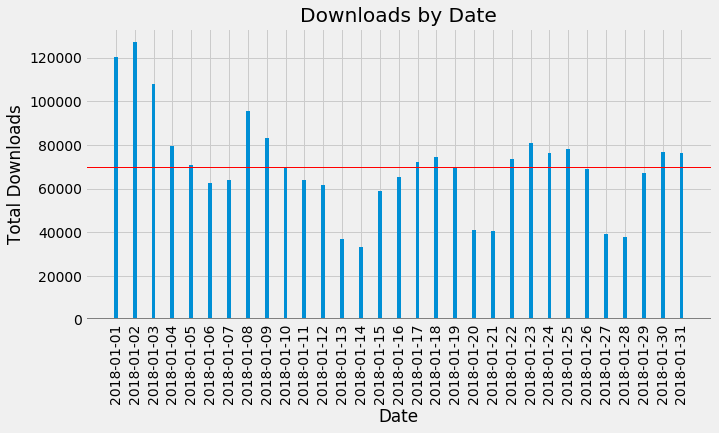

In [6]:
tick_loc = range(len(date_df['total_downloads']))
plt.figure(figsize=(10,5))
plt.bar(tick_loc, date_df['total_downloads'],
        width=0.2,align='center')
plt.xticks(tick_loc, date_df['date'], rotation=90)
plt.title('Downloads by Date')
plt.xlabel('Date')
plt.ylabel('Total Downloads')
plt.axhline(y=0, color='grey')
plt.axhline(y=average_daily_downloads, color='red', linewidth =1)  ## horizontal line that shows average downloads per day
plt.show()

In [7]:
## Creates new day of the week column
## Ran this here instead of on the main dataframe so that it would be run over 31 records instead of all 2,175,996 rows 
date_df['weekday'] = ''
for index, row in date_df.iterrows():
    date_string = date_df.loc[index, 'date']
    date_object = datetime.strptime(date_string, '%Y-%m-%d')
    date_df.loc[index, 'weekday'] = date_object.strftime('%A')
date_df.head()

,date,total_downloads,weekday
0,2018-01-01,120528,Monday
1,2018-01-02,127267,Tuesday
2,2018-01-03,108229,Wednesday
3,2018-01-04,79610,Thursday
4,2018-01-05,70896,Friday


In [8]:
weekday_groupby = date_df.groupby(['weekday'])
weekday_df = weekday_groupby.sum()[['total_downloads']]
print(weekday_df['total_downloads'].sum() - len(packages_df)) ## validating all records are accounted for
weekday_df.sort_values('total_downloads', ascending=False, inplace=True)
weekday_df

0


,total_downloads
weekday,
Tuesday,433523
Monday,415900
Wednesday,403536
Thursday,296324
Friday,271200
Saturday,179667
Sunday,175846


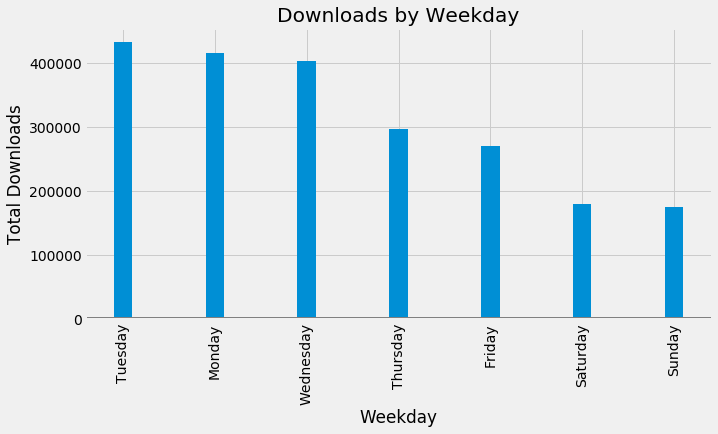

In [9]:
tick_loc = range(len(weekday_df['total_downloads']))
plt.figure(figsize=(10,5))
plt.bar(tick_loc, weekday_df['total_downloads'],
        width=0.2,align='center')
plt.xticks(tick_loc, weekday_df.index, rotation=90)
plt.title('Downloads by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Downloads')
plt.axhline(y=0, color='grey')
plt.show()

## What are the top 5 most popular packages?
The five most popular packages are:
 1. conda
 2. python
 3. certifi
 4. numpy
 5. setuptools

In [10]:
pkg_name_df = groupby_total_downloads(packages_df, 'pkg_name')
pkg_name_df.head(5)

,total_downloads
pkg_name,
conda,42009
python,35327
certifi,33688
numpy,31913
setuptools,31311


## How popular is each operating system?
Linux is by far the most popular platform it has over twice as many downloads as windows and osx combined.  The bar chart below illustrates how much more popular it is than windows and OS X.

In [11]:
pkg_platform_df = groupby_total_downloads(packages_df, 'pkg_platform')
pkg_platform_df

,total_downloads
pkg_platform,
linux,1448969
win,511428
osx,211643


In [12]:
total_linux_downloads = pkg_platform_df.loc['linux', 'total_downloads']
total_osx_downloads = pkg_platform_df.loc['osx', 'total_downloads']
total_win_downloads = pkg_platform_df.loc['win', 'total_downloads']
total_linux_downloads - (total_osx_downloads + total_win_downloads) * 2

2827

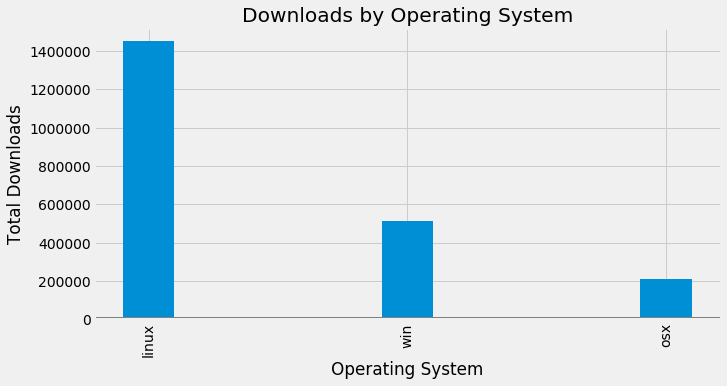

In [13]:
tick_loc = range(len(pkg_platform_df['total_downloads']))
plt.figure(figsize=(10,5))
plt.bar(tick_loc, pkg_platform_df['total_downloads'],
        width=0.2,align='center')
plt.xticks(tick_loc, pkg_platform_df.index, rotation=90)
plt.title('Downloads by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Total Downloads')
plt.axhline(y=0, color='grey')
plt.show()

## Should we stop supporting Python 3.5 in future Anaconda releases?
This is a difficult question to answer with only the data provided.  Initially, I would so no, you should not stop supporting Python 3.5 in future Anaconda releases at this time because 43% of packages with requirements have it has the basic requirement.

As with any question, I would like to know the opportunity cost of continuing to support it.  What other projects could be delievered if you weren't spending time supporting 3.5?

Since only 2% of downloads support 3.4 or 3.3, I believe there is potential to move away from supporting 3.5, but the timing must be right.  Any data that shows what users have installed would help with this decision.

In [14]:
pkg_python_df = groupby_total_downloads(packages_df, 'pkg_python')
pkg_python_df

,total_downloads
pkg_python,
35.0,608411
36.0,414405
27.0,355918
34.0,34329
33.0,3831
26.0,3331


In [15]:
total_versions = len(pkg_python_df)
total_versions

6

In [16]:
total_downloads_requiring_35 = pkg_python_df.loc[35.0, 'total_downloads']
total_downloads_w_requirements = pkg_python_df['total_downloads'].sum()
total_downloads_requiring_35 / total_downloads_w_requirements

0.42839057191642171

In [17]:
total_downloads_requiring_34 = pkg_python_df.loc[34.0, 'total_downloads']
total_downloads_requiring_34 / total_downloads_w_requirements

0.024171522117974263